# Distribution of compact binary source redshift (Short example)

* refer to 'Merger rate density model comparision' example for details on various BBH models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# calling necessary class from ler package
from ler.gw_source_population import CBCSourceRedshiftDistribution

Setting multiprocessing start method to 'fork'


## BBH

In [2]:
# Default inputs
# z_min=0.001, z_max=10.
# merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018" 
# merger_rate_density_param=dict(R0=23.9*1e-9, b2=1.6, b3=2.0, b4=30)
cbc = CBCSourceRedshiftDistribution()


Initializing CBCSourceRedshiftDistribution...

luminosity_distance interpolator will be loaded from ./interpolator_pickle/luminosity_distance/luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
using ler available merger rate density model: merger_rate_density_bbh_popI_II_oguri2018
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_bbh_popI_II_oguri2018_0.pickle
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_detector_frame_1.pickle


In [4]:
# sample source redshifts (source frame)
zs = cbc.source_redshift(50000)

### Plots

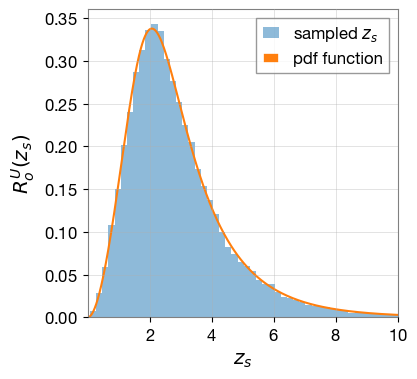

In [7]:
plt.figure(figsize=(4,4))

# histogram of source redshifts
plt.hist(zs, bins=50, density=True, label=r"sampled $z_s$", alpha=0.5)
plt.xlabel(r"$z_s$")
plt.ylabel(r"$R_o^U(z_s)$")

# pdf of source redshifts
# source frame
z = np.geomspace(0.01, 10, 1000)
# normalised to 1
pdf = cbc.source_redshift.pdf(z)
plt.plot(z, pdf, label="pdf function")
plt.xlim(0.001, 10)
plt.legend()
plt.grid(alpha=0.5)

plt.show()

## BNS

* star formation rate (SFR) with time delay

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_1.pickle
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be generated at ./interpolator_pickle/merger_rate_density_bbh_popI_II_oguri2018/merger_rate_density_bbh_popI_II_oguri2018_3.pickle


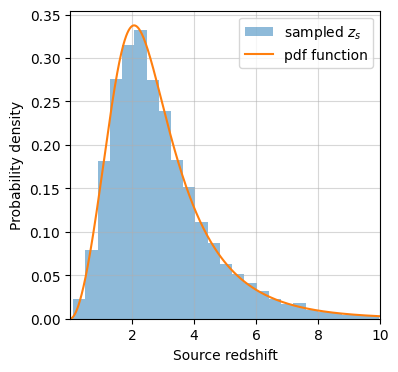

In [5]:
cbc = CBCSourceRedshiftDistribution(event_type='BNS')

# sample source redshifts (source frame)
zs = cbc.sample_source_redshift(10000)

plt.figure(figsize=(4,4))

# histogram of source redshifts
plt.hist(zs, bins=25, density=True, label=r"sampled $z_s$", alpha=0.5)
plt.xlabel("Source redshift")
plt.ylabel("Probability density")

# pdf of source redshifts
# source frame
z = np.geomspace(0.01, 10, 1000)
# normalised to 1
pdf = cbc.merger_rate_density_src_frame(z) / cbc.normalization_pdf_z
plt.plot(z, pdf, label="pdf function")
plt.xlim(0.001, 10)
plt.legend()
plt.grid(alpha=0.5)

plt.show()

* The normalised pdf of redshift distribution of BNS and BBH are the same
* But, the merger rate density is not sue to difference in the local merger rate density.